In [342]:
import pandas as pd 
import os
import numpy as np

os.chdir(r'C:\Users\nicho\OneDrive\Desktop\Bitcoin Regresssion Project')
BTC = pd.read_csv(r'BTC-USD.csv' , parse_dates = ['Date'], index_col=['Date'])
SNP = pd.read_csv(r'Standard&PoorsHistorical.csv', parse_dates = ['Date'], index_col=['Date'])
Margin = pd.read_csv(r'margin-statistics.csv')
CPI = pd.read_csv(r'CPIHistoricalData.csv', parse_dates = ['Date'], index_col= ['Date'])
Margin.head()

,Year-Month,Debit Balances in Customers' Securities Margin Accounts,Free Credit Balances in Customers' Cash Accounts,Free Credit Balances in Customers' Securities Margin Accounts
0,2021-11,"918,598","235,638","211,623"
1,2021-10,"935,862","226,159","200,548"
2,2021-09,"903,117","229,279","205,564"
3,2021-08,"911,545","219,365","198,913"
4,2021-07,"844,324","215,463","195,762"


In [343]:
#Dropping irrelevant features

Drop = ['Symbol', 'Open', 'High', 'Low', 'Volume BTC']
BTCDrop = BTC.drop(Drop, axis = 1)

Drop1 = ['Volume', 'Open', 'High', 'Low']
SNPDrop = SNP.drop(Drop1, axis = 1)


Drop3 = ['Open', 'High', 'Low', 'Volume']
CPIDrop = CPI.drop(Drop3, axis = 1)

Drop4 = ['Free Credit Balances in Customers\' Cash Accounts', 'Free Credit Balances in Customers\' Securities Margin Accounts']
MarginDrop = Margin.drop(Drop4, axis =1)

In [344]:
#Renaming Columns
BTCDrop.rename(columns = {'Close': 'BTC', 
                          'Volume USD': 'Liquidity'}, inplace = True)

SNPDrop.rename(columns = {'Close/Last': 'SNP close'}, inplace = True)

CPIDrop.rename(columns = {'Close/Last': 'CPI close'}, inplace = True)

  #Reversing order of DF
margin.rename(columns = {'Year-Month' : 'Date'}, inplace = True)
margin

,Date,Debit Balances in Customers' Securities Margin Accounts
298,1997-01,"103,337"
297,1997-02,"103,886"
296,1997-03,"104,835"
295,1997-04,"102,842"
294,1997-05,"111,097"
...,...,...
4,2021-07,"844,324"
3,2021-08,"911,545"
2,2021-09,"903,117"
1,2021-10,"935,862"


In [345]:
#Converting feature samples to monthly 
BTCMonthly = BTCDrop.resample('M').median()
CPIMonthly = CPIDrop.resample('M').median()
SNPMonthly = SNPDrop.resample('M').median()

#Setting index back to default
BTCMonthly.reset_index(inplace = True)
SNPMonthly.reset_index(inplace = True)
CPIMonthly.reset_index(inplace = True)

#Changing layout to use as key for merge
BTCMonthly['Date'] = BTCMonthly['Date'].dt.strftime('%Y-%m')
SNPMonthly['Date'] = SNPMonthly['Date'].dt.strftime('%Y-%m')
CPIMonthly['Date'] = CPIMonthly['Date'].dt.strftime('%Y-%m')

# Creating 2 Dataframes for testing to understand if larger data makes a difference in the predictability power

In [346]:
#Dataframe with Margin feature

MarginMerged = pd.merge(pd.merge(pd.merge(margin, BTCMonthly, on = 'Date'), SNPMonthly, on = 'Date'), CPIMonthly, on = 'Date')
MarginMerged.tail()

,Date,Debit Balances in Customers' Securities Margin Accounts,BTC,Liquidity,SNP close,CPI close
50,2019-12,"579,221",7241.660,5.251600e+06,3191.14,0.3
51,2020-01,"561,812",8425.180,8.405485e+06,3276.24,0.2
52,2020-02,"545,127",9703.440,1.251471e+07,3337.75,0.1
53,2020-03,"479,291",6428.540,1.961258e+07,2605.62,0.1
54,2020-04,"524,696",7036.005,1.737234e+07,2797.80,-0.4


In [347]:
#Cleaning comma from feature
NewDebitCol = MarginMerged['Debit Balances in Customers\' Securities Margin Accounts']
NewDebitCol = [col.replace(',', '') for col in NewDebit]
MarginMerged['Debit Balances in Customers\' Securities Margin Accounts'] = NewDebitCol
MarginMerged.head()

,Date,Debit Balances in Customers' Securities Margin Accounts,BTC,Liquidity,SNP close,CPI close
0,2015-10,513941,272.285,52742.23,2021.400,-0.2
1,2015-11,515410,337.720,291345.45,2086.590,-0.2
2,2015-12,503444,432.500,181367.62,2056.500,0.2
3,2016-01,487200,412.140,216413.12,1906.900,0.2
4,2016-02,474156,406.180,350955.64,1916.615,-0.1


In [326]:
#Dataframe without Margin feature
Merged = pd.concat([BTCDrop, SNPDrop, CPIDrop], axis=1, join='inner')
Merged

,BTC,Liquidity,SNP close,CPI close
Date,,,,
2020-04-09,7315.25,16310014.53,2789.82,0.1
2020-04-08,7369.60,18138080.27,2749.98,0.1
2020-04-07,7201.81,17047120.32,2659.41,0.1
2020-04-06,7336.96,26533750.17,2663.68,0.1
2020-04-03,6740.88,19692803.68,2488.65,0.1
...,...,...,...,...
2015-10-14,253.00,30115.77,1994.24,-0.1
2015-10-13,250.00,12875.40,2003.69,-0.1
2015-10-12,247.60,9493.89,2017.46,-0.1


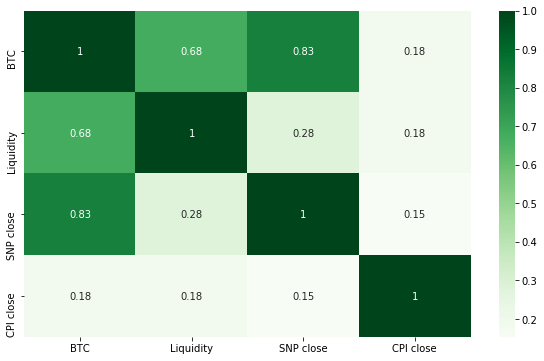

In [327]:
#Correlation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

correlations = MarginMerged.corr() 
plt.figure(figsize=(10,6))
sns.heatmap(correlations, cmap = 'Greens', annot = True)

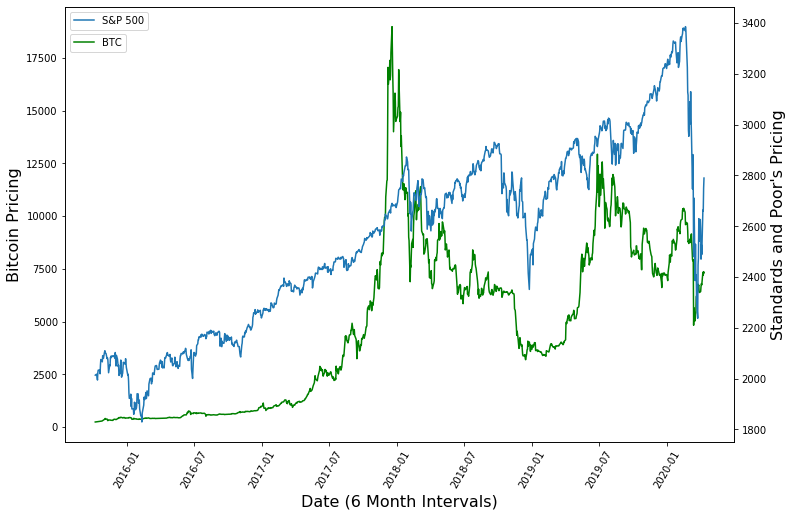

In [328]:
# Bitcoin & SNP Visualization
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (12,8))
x1 = plt.plot(Merged['BTC'],color = 'Green', label = 'BTC')
ax.set_xlabel('Date (6 Month Intervals)', fontsize = 16)
ax. set_ylabel('Bitcoin Pricing', fontsize = 16)
plt.xticks(rotation=60)
ax.legend(loc = 'upper left', bbox_to_anchor=(.0001, .95))

ax2 = ax.twinx()
ax2.plot(Merged['SNP close'],  label = 'S&P 500')
ax2.set_ylabel("Standards and Poor's Pricing", fontsize = 16)
ax2.legend()

In [298]:
#Bitcoin and Liquidity Visualization

In [374]:
#Model Creation
import torch
import random
from sklearn.preprocessing import StandardScaler


input1 = (MarginMerged.drop(['BTC', 'Date'], 1)) 
input2 = torch.tensor(inputs.astype(float).values)
output = torch.tensor([MarginMerged['BTC']])

sc=StandardScaler()
standardized_x = sc.fit_transform(input2) #Standardizing for better convergence of Gradients

w1 = torch.randn(1, requires_grad = True)  #Randomizing weights and allowing tracking of gradients
w2 = torch.randn(1, requires_grad = True)
w3 = torch.randn(1, requires_grad = True)
w4 = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)

def regression(x1, w1, x2, w2, x3, w3, x4, w4, b):        #Simple regression function
    y = x1 * w1 + x2 * w2 + x3 * w3 + x4 * w4 + b
    return y

print(input2)

tensor([[ 5.1394e+05,  5.2742e+04,  2.0214e+03, -2.0000e-01],
        [ 5.1541e+05,  2.9135e+05,  2.0866e+03, -2.0000e-01],
        [ 5.0344e+05,  1.8137e+05,  2.0565e+03,  2.0000e-01],
        [ 4.8720e+05,  2.1641e+05,  1.9069e+03,  2.0000e-01],
        [ 4.7416e+05,  3.5096e+05,  1.9166e+03, -1.0000e-01],
        [ 4.8391e+05,  4.1533e+05,  2.0247e+03, -2.0000e-01],
        [ 4.9518e+05,  4.8949e+05,  2.0807e+03,  1.0000e-01],
        [ 4.8987e+05,  4.9766e+05,  2.0634e+03,  2.5000e-01],
        [ 4.8764e+05,  1.1067e+06,  2.0872e+03,  3.0000e-01],
        [ 5.1322e+05,  6.1862e+05,  2.1638e+03,  2.0000e-01],
        [ 5.1016e+05,  6.9361e+05,  2.1804e+03,  2.0000e-01],
        [ 5.4062e+05,  7.3891e+05,  2.1599e+03,  2.0000e-01],
        [ 5.2376e+05,  1.6614e+06,  2.1412e+03,  2.0000e-01],
        [ 5.3997e+05,  1.4273e+06,  2.1769e+03,  3.0000e-01],
        [ 5.2937e+05,  1.6834e+06,  2.2570e+03,  4.0000e-01],
        [ 5.5356e+05,  2.2314e+06,  2.2716e+03,  3.0000e-01],
        

In [386]:
#Evaluating Model and Cost Function
yhat = regression(input2[:, 0], w1, input2[:, 1], w2, input2[:, 2], w3, input2[:, 3], w4, b)
print(yhat)

def MSE(yhat, y):
    sigma = torch.sum((yhat - y) **2)
    return sigma / len(y)

MSE(yhat, output)


tensor([  -766136.2741,   -910269.9667,   -827688.1826,   -825344.9633,
          -886781.1021,   -939034.5842,   -999291.1625,   -996561.4835,
         -1355946.4095,  -1101955.2536,  -1142216.8116,  -1212749.9003,
         -1737812.1974,  -1621638.2128,  -1758945.7766,  -2119769.5569,
         -2590650.6940,  -3916453.0230,  -4122350.1070,  -9693393.5401,
        -13584547.6533, -17504209.3513, -24114284.5156, -22302542.7874,
        -19064275.4255, -35323125.1089, -86678884.6189, -66240221.4384,
        -41395859.9706, -34334016.6174, -18819275.6493, -16508314.3713,
         -9682844.7546, -14240738.2622, -11479996.4053,  -9299528.3805,
         -9841421.4224, -15140955.9555, -10965320.5364,  -6465157.0859,
         -6044804.7645,  -4984105.2754,  -7711268.3907, -11424855.3688,
        -12303663.6678, -14704509.5725,  -9483839.7203,  -7645405.3528,
         -5656487.9378,  -5047090.0958,  -3954263.1534,  -5806911.3040,
         -8229332.1597, -12360791.8777, -11092046.1287], dtype=t

tensor(2.0991e+16, dtype=torch.float64, grad_fn=<DivBackward0>)

In [ ]:
#Optimization